In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pickle import dump
import tensorflow as tf
from google.colab import files
import io
from tensorflow.keras.models import Sequential, model_from_json

In [40]:
def trainDataSet():
    uploaded = files.upload()
    df = pd.read_excel(io.BytesIO(uploaded['1_train.xls']))
    try:
        df.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
        df.drop(["a"], axis=1, inplace=True)
        #df = df.drop([0], axis=0, inplace=False)
        df.duplicated().sum()
        df = df.drop_duplicates()
    except:
        df = df
    
    arr = df.to_numpy()
    X = arr[:, 0:-1]
    Y = arr[:,-1]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train=scaler.transform(X_train)
    X_test=scaler.transform(X_test)

    dump(scaler, open('scaler.pkl', 'wb'))
    return (X_train, X_test, Y_train, Y_test, scaler)

In [41]:
#(X_train, X_test, Y_train, Y_test, scaler) = trainDataSet()

In [3]:
df = pd.read_csv('/content/1.csv')

In [4]:
df.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
df.drop(["a"], axis=1, inplace=True)

In [5]:
df

,X1,X2,X3,X4,X5,X6,X12,X18,Y
0,20000,2,2,1,24,2,3913,0,1
1,120000,2,2,2,26,-1,2682,0,1
2,90000,2,2,2,34,0,29239,1518,0
3,50000,2,2,1,37,0,46990,2000,0
4,50000,1,2,1,57,-1,8617,2000,0
...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,188948,8500,0
29996,150000,1,3,2,43,-1,1683,1837,0
29997,30000,1,2,2,37,4,3565,0,1
29998,80000,1,3,1,41,1,-1645,85900,1


In [6]:
arr = df.to_numpy()
X = arr[:, 0:-1]
Y = arr[:,-1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)
scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

dump(scaler, open('scaler.pkl', 'wb'))

In [7]:
X_train = tf.convert_to_tensor(X_train, dtype=tf.float64)
Y_train = tf.convert_to_tensor(Y_train, dtype=tf.float64)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float64)
Y_test = tf.convert_to_tensor(Y_test, dtype=tf.float64)

In [8]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X_train, Y_train = smt.fit_resample(X_train, Y_train)
X_test, Y_test = smt.fit_resample(X_test, Y_test)

In [9]:
aclass_weights = { 0: 0.4, 1: 0.60}

In [19]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential(
                        [keras.Input(shape=(8,)),
                            layers.Dense(7, activation = "sigmoid"),
                            layers.Dense(5, activation = "sigmoid"),
                            layers.Dense(4, activation = "sigmoid"),
                            layers.Dense(3, activation = "sigmoid"),
                            layers.Dense(1, activation = "sigmoid", name = "output")])

In [20]:
model.compile(
     optimizer=keras.optimizers.Adam(),
     loss=keras.losses.BinaryCrossentropy(),
     metrics=[keras.metrics.TruePositives(), keras.metrics.FalseNegatives(), keras.metrics.FalsePositives(), keras.metrics.TrueNegatives(), keras.metrics.Recall(), keras.metrics.Precision(), keras.metrics.BinaryAccuracy(), keras.metrics.AUC()])

In [21]:
history = model.fit(X_train, Y_train, epochs = 100 , class_weight = aclass_weights)

Epoch 1/100
1094/1094 [==============================] - 4s 2ms/step - loss: 0.3755 - true_positives_3: 7644.0000 - false_negatives_3: 9847.0000 - false_positives_3: 7906.0000 - true_negatives_3: 9585.0000 - recall_3: 0.4370 - precision_3: 0.4916 - binary_accuracy: 0.4925 - auc_3: 0.4958
Epoch 2/100
1094/1094 [==============================] - 3s 2ms/step - loss: 0.3364 - true_positives_3: 17491.0000 - false_negatives_3: 0.0000e+00 - false_positives_3: 17491.0000 - true_negatives_3: 0.0000e+00 - recall_3: 1.0000 - precision_3: 0.5000 - binary_accuracy: 0.5000 - auc_3: 0.5213
Epoch 3/100
1094/1094 [==============================] - 3s 3ms/step - loss: 0.3287 - true_positives_3: 17477.0000 - false_negatives_3: 14.0000 - false_positives_3: 17460.0000 - true_negatives_3: 31.0000 - recall_3: 0.9992 - precision_3: 0.5002 - binary_accuracy: 0.5005 - auc_3: 0.6898
Epoch 4/100
1094/1094 [==============================] - 3s 3ms/step - loss: 0.2988 - true_positives_3: 11264.0000 - false_negative

In [23]:
results = model.evaluate(X_test, Y_test)

368/368 [==============================] - 1s 2ms/step - loss: 0.5901 - true_positives_3: 4854.0000 - false_negatives_3: 1019.0000 - false_positives_3: 2857.0000 - true_negatives_3: 3016.0000 - recall_3: 0.8265 - precision_3: 0.6295 - binary_accuracy: 0.6700 - auc_3: 0.7707


In [26]:
!mkdir -p saved_model
model.save('saved_model/my_model')

In [27]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [28]:
model.save('saved_model/my_model')

368/368 [==============================] - 1s 3ms/step


Text(0, 0.5, 'True Positive Rate')

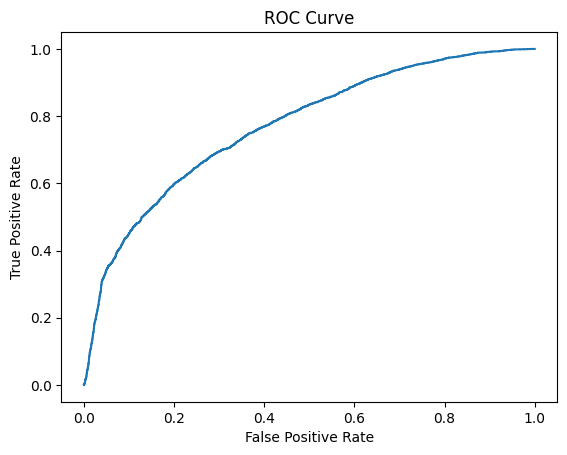

In [29]:
from sklearn.metrics import roc_curve
Y_pred = model.predict(X_test).ravel()
fpr, tpr, threshold = roc_curve(Y_test, Y_pred)
plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

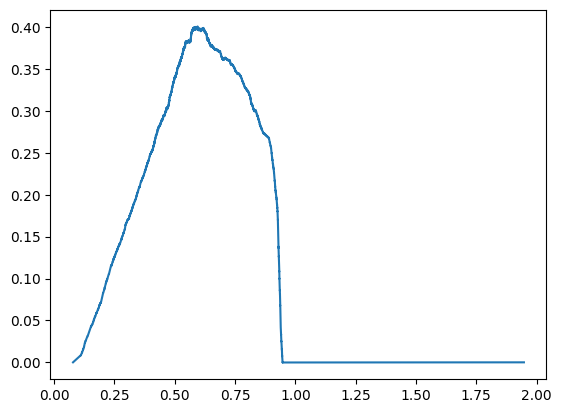

In [30]:
plt.plot(threshold, tpr-fpr)

In [31]:
YJI = threshold[np.argmax(tpr-fpr)]

In [33]:
print(YJI) #optimum threshold value using Youden's J Statistic

0.59442115


In [34]:
print(tpr[np.argmax(tpr-fpr)], fpr[np.argmax(tpr-fpr)])

0.6453260684488337 0.24450876894261878


In [35]:
Y_pred = model.predict(X_test)

368/368 [==============================] - 1s 2ms/step


In [36]:
credit = 850 - 550*Y_pred

In [37]:
credit

array([[501.08377],
       [632.834  ],
       [561.69556],
       ...,
       [432.99026],
       [349.83817],
       [332.12592]], dtype=float32)

In [38]:
credit.shape

(11746, 1)

In [39]:
idx = 11646
print("Default Status: ",Y_test[idx], " Credit Score : ", credit[idx]," Probability of Default: ", Y_pred[idx])

Default Status:  1.0  Credit Score :  [599.21875]  Probability of Default:  [0.4559659]
